In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
# get the path of the model
model_name = 'SpikeResnet'
path_model = os.path.join('..','Backstage',model_name)

In [3]:
# get prediction dataframe from Backstage/Model_name
bonobo_pred = pd.read_csv(path_model+'/bonobo_pred.csv')
bonobo_pred = pd.read_csv(path_model+'/93.7_predictions.csv')

# get labels dataframe from Judge
path_bonobo_labels = os.path.join('..','Judge','testset_bonobo_events.csv')
bonobo_labels = pd.read_csv(path_bonobo_labels)


In [4]:
# add prediction of event file to labels
bonobo_all = bonobo_labels.merge(bonobo_pred, on='event_file', how='left')

# only look at samples rated by > 8 people
ultra_quality_filter = bonobo_pred['total_votes_received']>=8
# only look at samples rated rated strong agreement
frac_filter = (bonobo_pred['fraction_of_yes'] > 6/8) | (bonobo_pred['fraction_of_yes'] < 2/8)

# apply filters
bonobo_all = bonobo_pred[ultra_quality_filter & frac_filter]
bonobo_all

,event_file,fraction_of_yes,total_votes_received,Mode,preds
6,Bonobo00049_0_255442,0.000000,8,Test,3.049172e-07
10,Bonobo00186_0_3402,0.000000,12,Test,1.354690e-07
11,Bonobo00200_0_128917,0.875000,8,Test,1.708341e-11
16,Bonobo00204_0_18,0.000000,12,Test,3.464716e-10
17,Bonobo00207_0_2255,0.066667,15,Test,1.727802e-03
...,...,...,...,...,...
2123,Bonobo06895_0_1796,0.000000,12,Test,5.050576e-09
2124,Bonobo06895_0_2502,0.000000,15,Test,5.781548e-03
2125,Bonobo06895_0_2970,0.000000,12,Test,1.056784e-02
2126,Bonobo06944_0_2647,0.000000,15,Test,7.071003e-02


In [5]:
# extract labels and predictions as lists
labels = bonobo_all.fraction_of_yes.round(0).astype(int)
preds = bonobo_all.preds.values

In [6]:
# calculate the roc curve for the model
fpr, tpr, thresholds = roc_curve(labels, preds)
# calculate the AUC
roc_auc = auc(fpr, tpr)

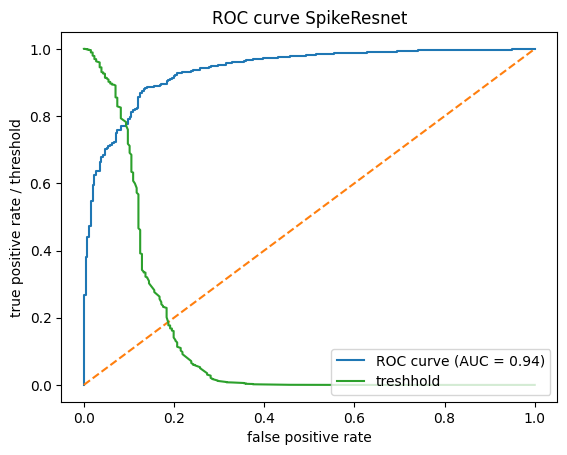

In [7]:
# plot the results

# workaround for tresholds are too high
thresholds[thresholds>1]=1
plt.plot(fpr,tpr,label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0, 1], linestyle='--')
plt.plot(fpr,thresholds,label='treshhold')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate / threshold')
plt.legend(loc="lower right")
plt.title('ROC curve '+model_name)
plt.savefig(path_model+'/Results/Easy_AUC.png')

In [8]:
# write brier score to text file
with open(path_model+'/Results/results.txt', 'a') as f:
    f.write('Easy AUC: '+str(roc_auc)+'\n')